# Aprendizaje Formal

## Práctica 10: Algoritmo K-means

En esta práctica vamos a estudiar el algoritmo K-means para clustering. Realizaremos la implementación del mismo paso por paso y terminaremos comparando diferentes particiones obtenidas con K-means mediante el índice de validez de Davies-Bouldin.


## Índice de la práctica

- [Lectura y visualización de datos](#Lectura-y-visualización-de-datos)
- [Implementación del algoritmo K-means](#Implementación-del-algoritmo-K-means)
- [Índices de validez y mejor valor de k](#Índices-de-validez-y-mejor-valor-de-k)
- [Estudio para diferentes problemas](#Estudio-para-diferentes-problemas)
- [K-means en scikit [Opcional]](#K-means-en-scikit-[Opcional])
- [Otros datos [Opcional]](#Otros-datos-[Opcional])

Importamos todas las librerías que vamos a utilizar inicialmente. Posteriormente iremos importando las librerías específicas de cada apartado de la práctica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from test_helper import Test
from matplotlib.colors import ListedColormap
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

## Lectura y visualización de datos

Utiliza la función loadtxt de numpy para cargar los datos disponibles en el fichero `ex3K.tx`.

In [34]:
#Cargar la matriz de datos X
X = np.loadtxt('ex3K.txt', delimiter=',')

#Mostrar las dimensiones (n) y el numero de ejemplos (m)
m, n = X.shape
print("El numero de ejemplos y su dimension es {}x{}".format(m, n))

El numero de ejemplos y su dimension es 198x2


In [35]:
Test.assertEquals(m, 198, 'Número de ejemplos incorrecto')
Test.assertEquals(n, 2, 'Número de dimensiones incorrecto')

1 test passed.
1 test passed.


Ahora completa la función mostrar para que muestre los ejemplos leídos. En caso de recibir un vector $c$ con los índices de los clústers a los que pertenecen los ejemplos, los ejemplos de cada clúster deberán pintarse de un color.

In [36]:
def mostrar(X, c=None, centroids=None):
    """
    Esta función muestra los ejemplos de un problema de clustering
    En caso de estar asignados a un clúster, muestra los ejemplos de cada clúster de un color
    Para ello, c deberá tener el índice del clúster al que pertenece cada ejemplo
    Dibujaremos también los centroides si vienen como entrada
    :param X: Matriz con los ejemplos a mostrar
    :param c: Índices de los clústers a los que pertenece cada ejemplo
    :param centroids: Centroides de los clústers
    :return: Nada
    """
    # Creamos los mapas de colores a utilizar
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])

    # Creamos la figura
    plt.figure(figsize=(10,8))
    # Pintamos los puntos
    plt.scatter(X[:,0], X[:,1], c=c, cmap=cmap_bold)
    # Pintamos los centroides si los hay 
    if centroids is not None:
        plt.scatter(centroids[:,0], centroids[:,1], cmap=cmap_bold, marker='x')
    # Mostramos la figura
    plt.show()
    return

Muestra los ejemplos leídos haciendo uso de la función anterior.

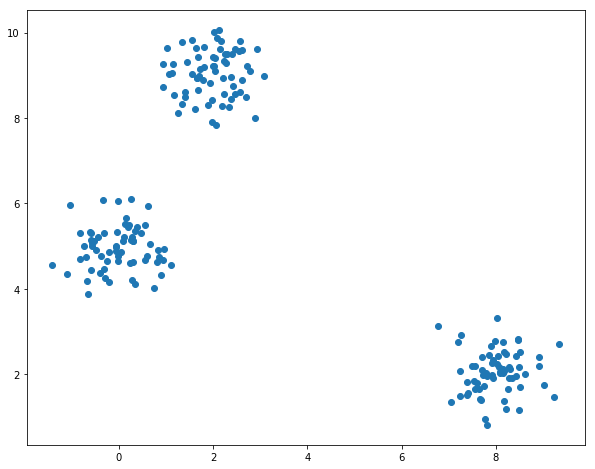

In [37]:
mostrar(X)

## Implementación del algoritmo K-means


Vamos a realizar la implementación del algoritmo k-means por partes.

Primero vamos a inicializar todas las variables que necesitamos.
- k va a ser el número de clústeres que queremos utilizar (lo pondremos al número de clústeres que esperamos encontrar en el ejemplo de la figura)
- centroids va a ser un vector en el que estarán los centroides iniciales, por lo tanto tiene que ser de dimensión $k\times n$. Como centroides, seleccionaremos inicialmente $k$ ejemplos de manera aleatoria del conjunto de datos.
- c es un vector en el que almacenaremos el índice del clúster al que está asignado cada elemento. Lo inicializaremos a ceros.

Finalmente, utiliza la función mostrar para ver los puntos y los centroides inicializados aleatoriamente.

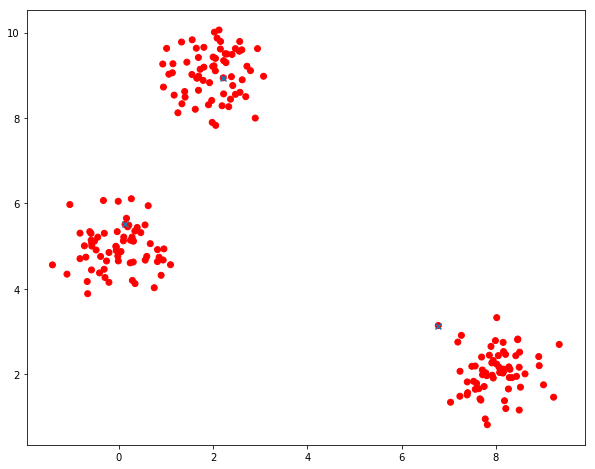

In [38]:
np.random.seed(12345)

# Inicializar k, centroids y c
k = 3
centroids = X[np.random.choice(m, 3, replace=False), :]
c = np.zeros(m)

# Mostramos
mostrar(X, c, centroids)

In [39]:
Test.assertEquals((centroids == [[ 2.2143,8.9422 ], [ 6.7784,3.1424 ], [ 0.13173,  5.5118 ]]).all(), True, 'Inicialización de c incorrecta')
Test.assertEquals((c[:10]==[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]).all(), True, 'Inicialización de c incorrecta')

1 test passed.
1 test passed.


Una vez que hemos inicializado las variables necesarias, vamos a crear dos funciones.
1. Una que llamaremos `asigna`, que se encarga de asignar, es decir de establecer los valores del vector c, es decir, establecerá para cada ejemplo su cluster más cercano (los índices de los clústeres serán 0, 1, 2, etc.). 
2. La otra función que llamaremos `actualiza`, será la encargada de calcular la posición de los nuevos centroides, conociendo el nuevo vector c.

Crea una función `asigna` a la se le pasen como parámetros los ejemplos y los centroides y devuelva un vector c en el que aparezca el cluster más cercano para cada ejemplo, es decir el clúster cuyo centroide este a una distancia Euclidea mínima.

In [40]:
def asigna(X, centroides):
    """
    Recibe los ejemplos y los centroides y calcula a qué clúster pertenece cada ejemplo
    :param X: Matriz con los ejemplos
    :param centroides: Matriz con un centroide en cada fila
    :return: Vector c con la asignación de cada ejemplo a un clúster (entre 0 y k-1)
    """
    distancias = np.zeros((centroides.shape[0], X.shape[0]))
    for i in range(centroides.shape[0]):
        distancias[i,:] = np.sum((centroides[i,:]-X)**2, axis=1)
        
    return np.argmin(distancias, axis=0)

Con la inicialización aleatoria que hemos creado antes, comprobamos la función asigna y vemos si los ejemplos se asignan a los clústers debidamente en base a la gráfica.

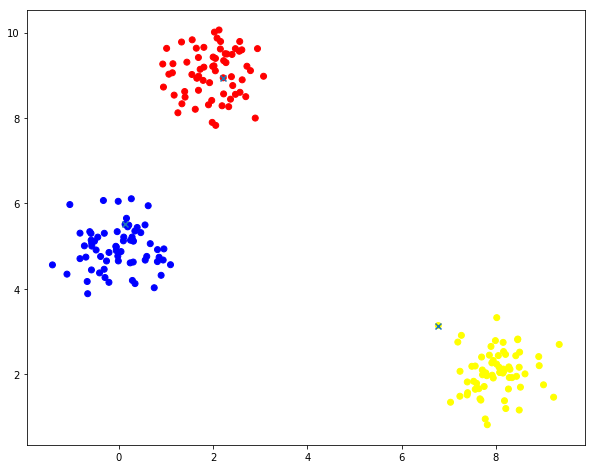

In [41]:
# Utiliza asigna y luego muestra los resultados
c = asigna(X, centroids)
mostrar(X, c, centroids)

In [42]:
Test.assertEquals( (c== [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]).all(), True, 'Asigna incorrecta' )

1 test passed.


Crea una función `actualiza` a la que se le pasen como parámetros los ejemplos, el vector c (el vector que muestra el cluster al que está asignado cada ejemplo) y el número de clústeres que estamos buscando y devuelva un vector con los valores de los nuevos centroides.

In [43]:
def actualiza(X, centroides, c, k):
    """
    Recibe los ejemplos, los centroides, el vector c y el número de centroides (k) 
    y recalcula la nueva posición de los centroides
    :param X: Matriz con los ejemplos
    :param centroides: Matriz con los centroides actuales
    :param c: Asignación de los ejemplos a los clústeres
    :param k: Número de clústers
    :return: Nuevos centroides
    """
    for i in range(k):
        centroides[i, :] = np.mean(X[c==i,:], axis=0)
    
    return centroides

Comprobamos la función actualiza. Utilízala para recalcular la posición de los clústers y muestra el resultado.

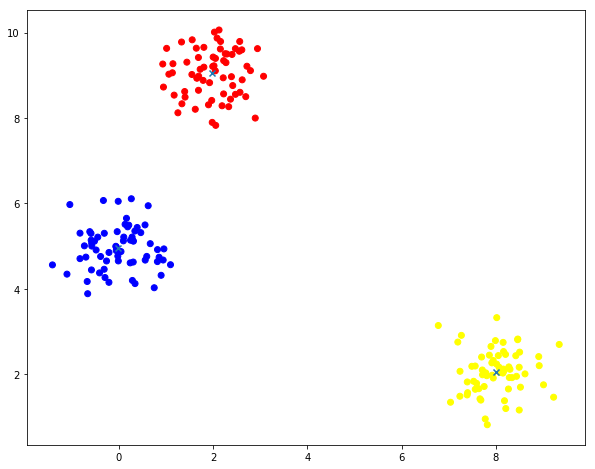

In [44]:
# Aplica actualiza y muestra los resultados
centroids = actualiza(X, centroids, c, k)
mostrar(X, c, centroids)

In [45]:
Test.assertEquals((np.round(centroids, 4) == [[ 1.9771,  9.0468], [ 8.0052,  2.0589], [-0.0168,  4.9587]]).all(), True, 'Actualiza incorrecta')

1 test passed.


Finalmente vamos a crear una función que calcule el valor de la función objetivo, dados unos ejemplos, unos centroides y un vector de asignaciones.

In [46]:
def coste(X, centroides, c):
    """
    Esta función recibe los ejemplos, los centroides y las asignaciones de cada ejemplo a un clúster (vector c)
    y devuelve el coste asociado a dicho particionamiento.
    :param X: 
    :param centroides: 
    :param c: 
    :return: 
    """
    return np.sum((X - centroides[c, :])**2) / X.shape[0]

Comprueba que la función coste funciona correctamente con el estado actual del clustering.

In [47]:
cost = coste(X, centroids, c)
cost

0.5498971539915939

In [16]:
Test.assertEquals(round(cost, 8), 0.54989715, 'Función de coste incorrecta')

1 test passed.


Finalmente creamos el algoritmo. Primero vamos a ejecutarlo con un número de iteraciones fijo (it = 10). Imprime en una gráfica el valor la función objetivo para ver que ésta decrece y por lo tanto el algoritmo está convergiendo.

In [58]:
# Algoritmo k-means
def kmeans(X, k, it=10):
    """
    Recibe los ejemplos, el valor de k y el número de iteraciones y aplica el algoritmo k-means
    :param X: Matriz con los ejemplos
    :param k: Número de clústers a encontrar
    :param it: Número de iteraciones a realizar (10 por defecto)
    :return: Una tupla (centroids, J, c) con los centroides, un vector J con el 
            error en cada iteración y el vector c con la asignación de cada ejemplo a un clúster
    """
    # Inicializar centroides aleatoriamente
    m = X.shape[0]
    
    centroides = X[np.random.choice(m, k, replace=False), :]
    c = np.zeros(m)
    J = np.zeros(it)
    
    for i in range(it):
        
        c = asigna(X, centroides)
        mostrar(X, c, centroides)
        centroides = actualiza(X, centroides, c, k)
        
        J[i] = coste(X, centroides, c)
        
    return centroides, J, c

Comprueba que el algoritmo funciona. Ejecuta la función `kmeans` y muestra sus resultados y comprueba que el error decrece en cada iteración de k-means.

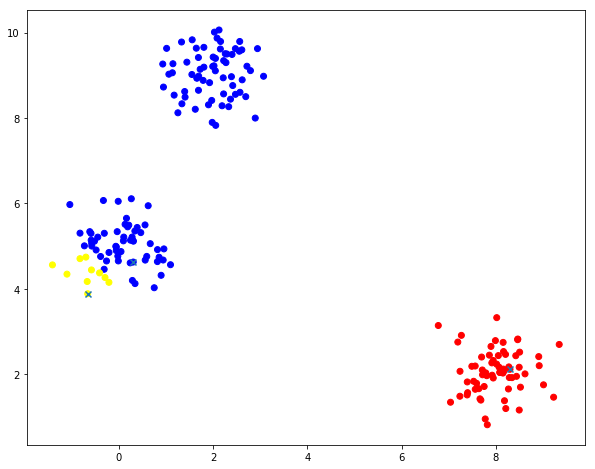

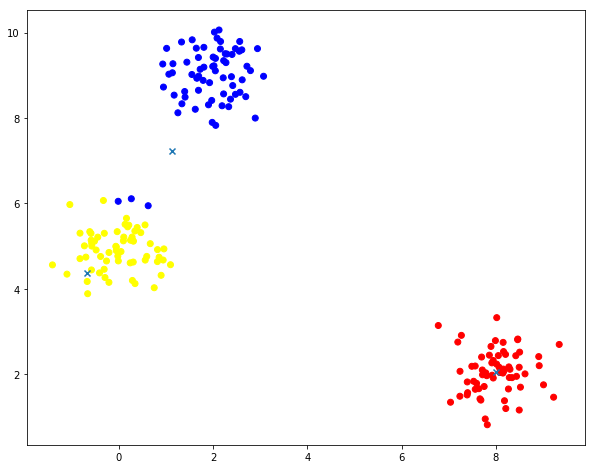

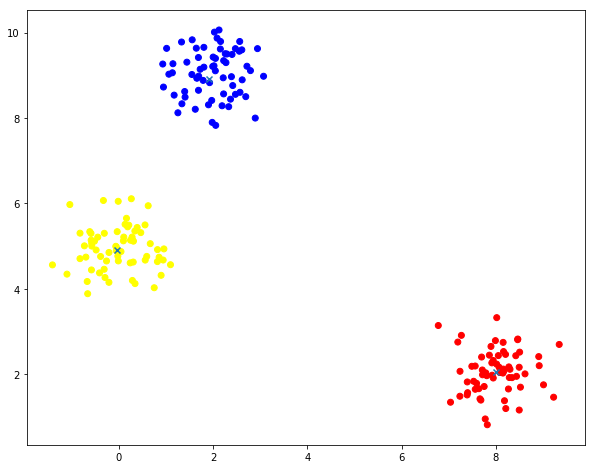

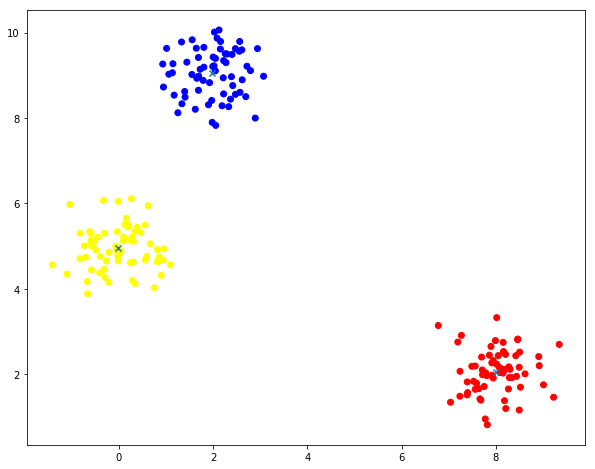

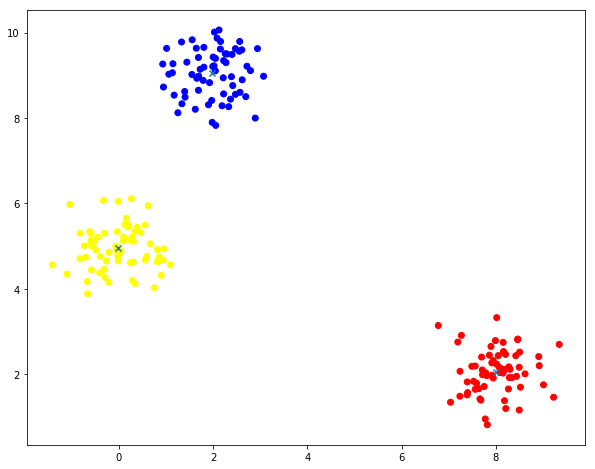

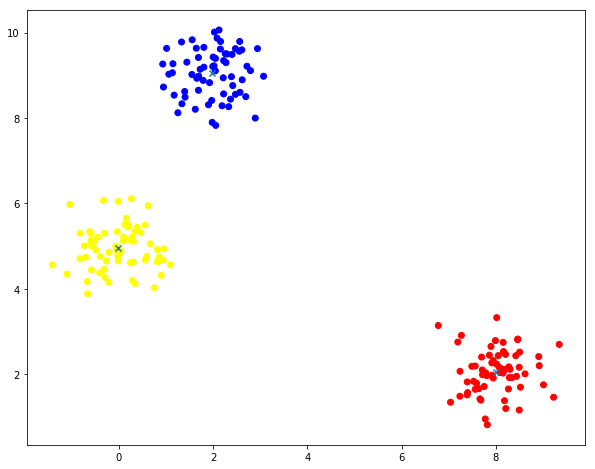

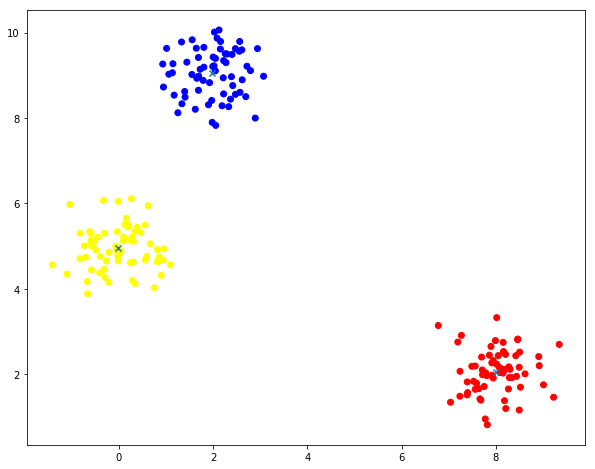

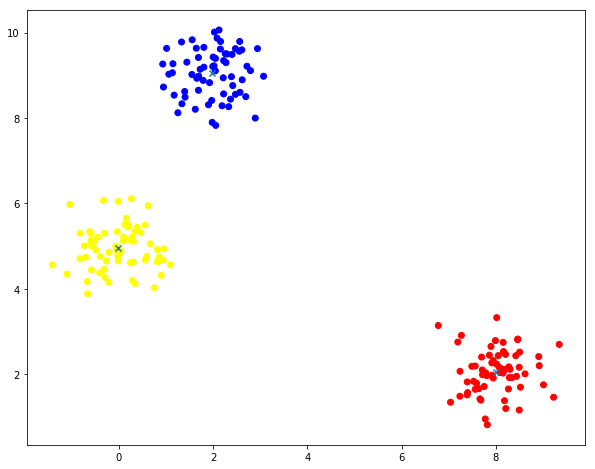

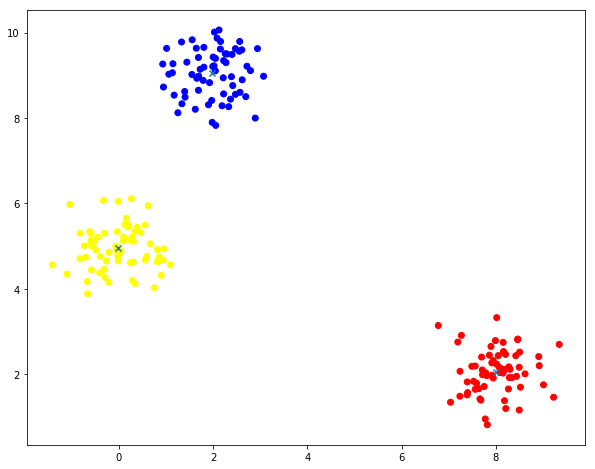

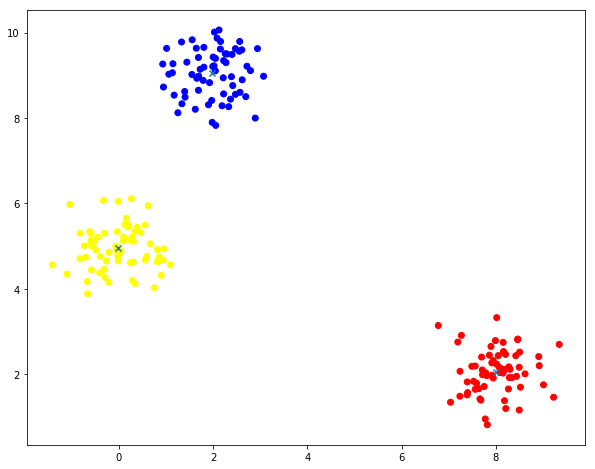

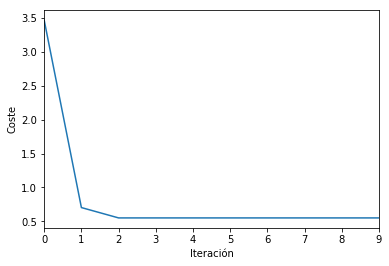

In [59]:
np.random.seed(123524)

# Ejecutamos kmeans y mostramos el resultado
centroids, J, c = kmeans(X, 3)
#mostrar(X, c, centroids)

# Dibuja la gráfica del error
plt.plot(np.arange(10), J)
plt.xlim(0,9)
plt.xlabel('Iteración')
plt.ylabel('Coste');

In [19]:
Test.assertEquals((np.round(centroids, 4) == [[ 8.0052,  2.0589], [-0.0168,  4.9587], [ 1.9771,  9.0468]]).all(), True, 'Centroides incorrectos')
Test.assertEquals((np.round(J, 4) == [ 3.466 ,  0.7026,  0.5499,  0.5499,  0.5499,  0.5499,  0.5499, 0.5499,  0.5499,  0.5499]).all(), True, 'Errores incorrectos')

1 test passed.
1 test passed.


Ya hemos conseguido que el algoritmo k-means funcione. Ahora debes crear una función que ejecute el algoritmo k-means con 10 inicializaciones aleatorias diferentes (parámetro configurable, por defecto a 100) y devuelva los centroides y el vector c de la solución con menor valor de la función objetivo.

In [20]:
def ejecutaKmeans(X,k, repeticiones=100):
    """
    Recibe los ejemplos, un valor de k y el número de repeticiones a realizar y ejecuta el algortimo kmean
    dicho número de repeticiones y devuelve la partición en la que menor haya sido el error (coste)
    :param X: Matriz con los ejemplos
    :param k: Número de clústeres
    :param repeticiones: Número de repeticiones a realizar (100 por defecto)
    :return: Una tupla (centroidsMin, Jmin, Cmin) con los mejores centroides, el menor error encontrado (un valor) y 
    la asignación de los ejemplos a su clúster
    """
    centroidsMin = None
    Jmin = np.inf
    Cmin = None
    for i in range(repeticiones):
        centroides, J, c = kmeans(X, k)
        if J[-1] < Jmin:
            centroidsMin = centroides
            Jmin = J[-1]
            Cmin = c
            
    return centroidsMin, Jmin, Cmin

Comprueba que la función creada funciona y muestra su resultado.

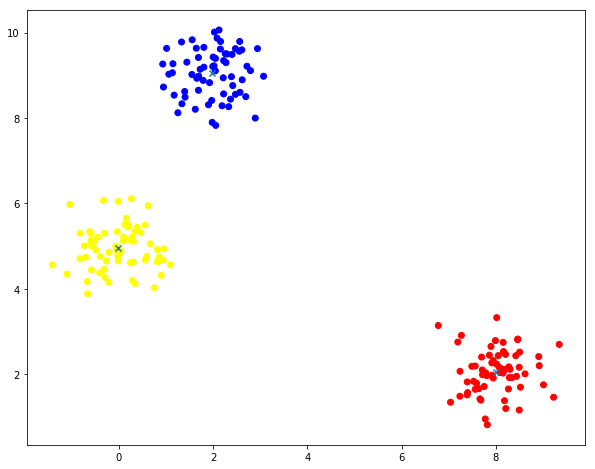

In [21]:
np.random.seed(1123123)
centroids, J, c = ejecutaKmeans(X, 3)
mostrar(X, c, centroids)

In [22]:
Test.assertEquals((np.round(centroids, 4) == [[ 8.0052,  2.0589], [-0.0168,  4.9587], [ 1.9771,  9.0468]]).all(), True, 'Centroides incorrectos')

1 test passed.


### Índices de validez y mejor valor de k

En esta segunda parte de la práctica vamos  programar dos métodos para establecer el mejor valor de k para cada problema.

El primero es la regla del "codo". Para ello debes ejecutar kmeans con diferentes valores de k (entre 2 y 10) y generar una gráfica que te permita observar cuál es el mejor valor de k según el punto donde esté el "codo" de la gráfica. Recuerda que según el problema es posible que dicho "codo" no esté claro.

C:\Users\javie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\javie\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Text(0,0.5,'Coste')

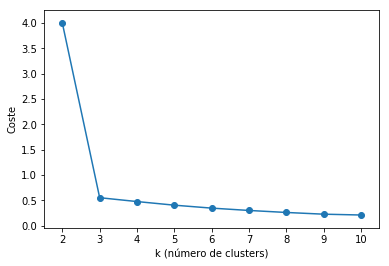

In [23]:
Jall = []
Kall = np.arange(2,11)

for k in Kall:
    centroids, J, c = ejecutaKmeans(X, k)
    Jall.append(J)

# Mostrar gráfica

plt.plot(Kall, Jall)
plt.scatter(Kall, Jall)
plt.xlabel('k (número de clusters)')
plt.ylabel('Coste')

¿Dónde está el codo? ¿Cuál es el mejor valor de k?

In [24]:
bestK = 3

In [25]:
Test.assertEqualsHashed(bestK, '77de68daecd823babbb58edb1c8e14d7106e83bb', 'Mejor valor de K incorrecto')

1 test passed.


El último paso es programar el índice Davies–Bouldin para comprobar dados unos datos y una partición (vector c) cómo de buena es esa partición (y poder compararla frente a otros valores de k).

Crea una función que tenga como parámetros el conjunto de datos, los centroides, el número de clústeres y el vector c, y devuelva el valor DB.

In [26]:
def davies_bouldin(X, centroids, k, c):
    """
    Establece lo buena que es una partición de los datos
    :param X: Matriz de ejemplos
    :param centroids: Centroides de los clústeres
    :param k: Número de clústeres
    :param c: Asignación de cada ejemplo a un clúster
    :return: 
    """
    compacticidad = np.zeros(k)
    separacion = {}
    
    for i in range(k):
        compacticidad[i] = np.sum((X[c==i,:]-centroids[i,:])**2) / len(X[c==i,:])
        
        for j in range(i+1, k):
            separacion[(i, j)] = np.sum((centroids[i,:]-centroids[j,:])**2)
    
    R = np.zeros(k)
    
    for i in range(k):
        for j in range(k):
            if i != j:
                Ractual = (compacticidad[i]+compacticidad[j])/separacion[(min(i,j), max(i,j))]
                if Ractual > R[i]:
                    R[i] = Ractual
                    
    return np.mean(R)


A continuación crea una función que haciendo uso de la función `davies_bouldin` permita obtener el mejor valor de k. 

Para ello, la función recibirá los ejemplos y el rango en el que queremos buscar $k \in [a, b)$. Para cada valor de k obtendrá la mejor partición de kmeans y calculará su índice de Davies-Bouldin. Finalmente, devolverá un vector con los valores de k probados, otro con los valores de Davies-Bouldin obtenidos y el mejor valor de k para dichos datos (aquel que obtenga el menor valor de Davies-Bouldin. 

In [27]:
def best_k_DB(X, a=2, b=10):
    """
    Esta función busca el mejor valor de k entre a y b para un conjunto de datos dado en base al índice de Davies-Bouldin
    :param X: Matriz de ejemplos
    :param a: Mínimo valor de k
    :param b: Máximo valor de k (no inclusivo)
    :return: Tupla (Kall, DBall, bestK) con los valores de k probados, los valores de DB y el mejor valor de K
    """    
    Kall = np.arange(a, b)
    DBall = np.zeros(b - a)
    
    for k in Kall:
        centroids, J, c = ejecutaKmeans(X, k)
        DBall[k - a] = davies_bouldin(X, centroids, k, c)
        
    bestK = np.argmin(DBall) + a
    return Kall, DBall, bestK

Comprueba ahora utilizando la función anterior que para para el conjunto de datos, el valor de mínimo de DB (para k=2, 3, 4, .., 9) coincide con el número de clústeres que hay realmente en el conjunto de datos. Dibuja también una gráfica que muestre para cada valor de k probado su índice de DB.

Best k: 3


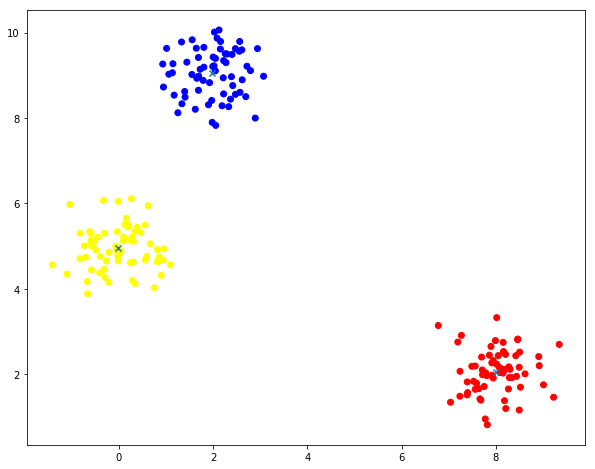

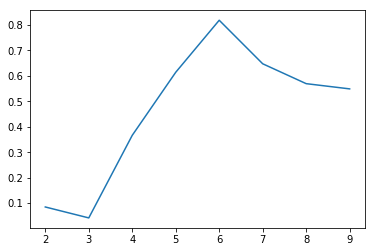

In [28]:
np.random.seed(121321)

Kall, DBall, bestK = best_k_DB(X)
print('Best k:', bestK)

centroids, J, c = ejecutaKmeans(X, bestK)

mostrar(X, c, centroids)
plt.plot(Kall, DBall)

In [29]:
Test.assertEqualsHashed(bestK, '77de68daecd823babbb58edb1c8e14d7106e83bb', 'Mejor valor de K incorrecto')

1 test passed.


## Estudio para diferentes problemas
Finalmente vamos a realizar un estudio más completo que nos permita establecer para todos los ficheros de datos facilitados en la práctica (desde ex2k.txt hasta ex8K.txt) cuál es el mejor número de clústers para cada problema. Puedes comprobar si estás de acuerdo acompañando la gráfica de los valores probados de k y el valor de DB con otra gráfica que muestre el problema y los clústeres encontrados.

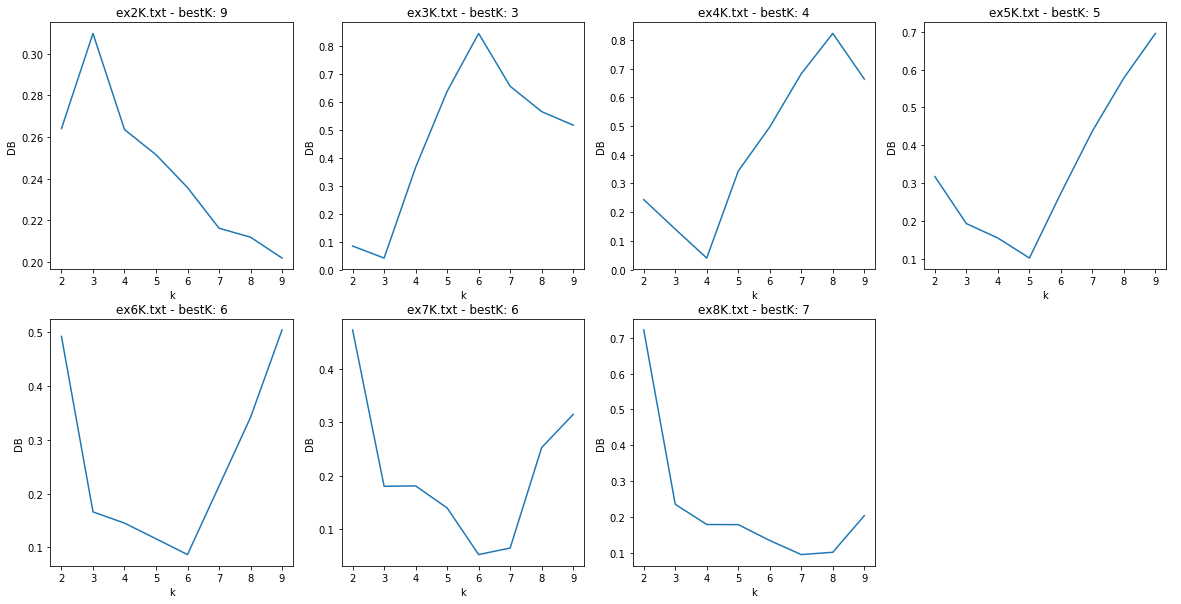

C:\Users\javie\Anaconda3\lib\site-packages\matplotlib\axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


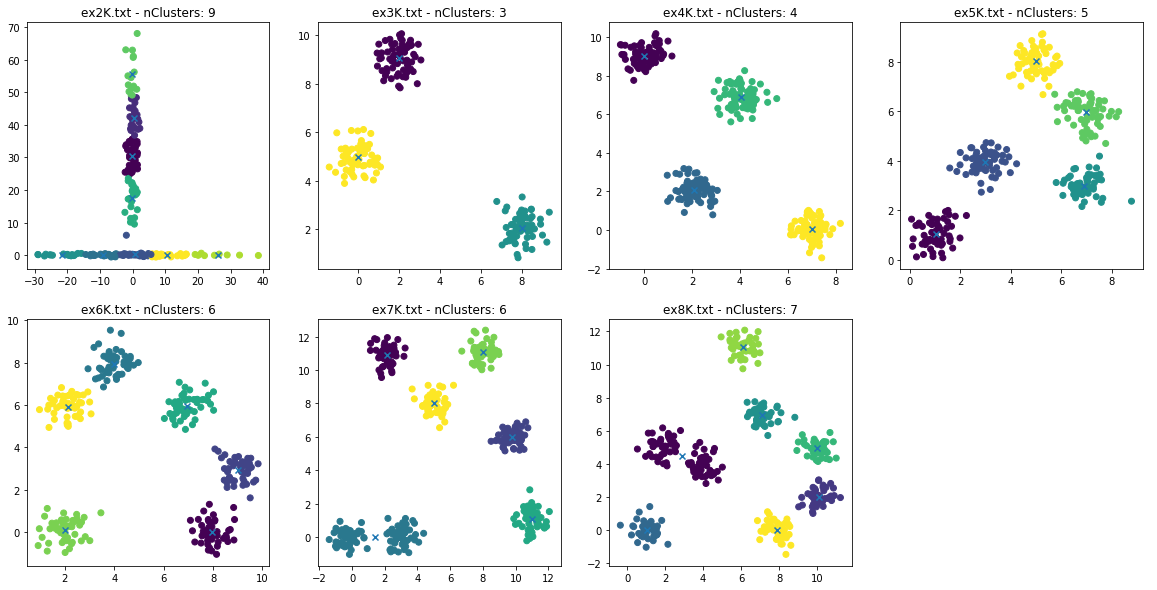

In [30]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])
start, end = 2, 8

# Gráficas de DB respecto a k
bestKs = []

fig, axes = plt.subplots(nrows=(end - start + 1) // 4 + ((end - start + 1) % 4 != 0), ncols=4, figsize=(20, 10))

for i in range(start, end + 1):
    X = np.loadtxt('ex' + str(i) + 'K.txt', delimiter=',')
    
    Kall, DBall, bestK = best_k_DB(X)
    
    axes[(i-2)//4, (i-2) % 4].plot(Kall, DBall)
    axes[(i-2)//4, (i-2) % 4].set_title('ex'+str(i)+'K.txt - bestK: ' + str(bestK))
    axes[(i-2)//4, (i-2) % 4].set_xlabel('k')
    axes[(i-2)//4, (i-2) % 4].set_ylabel('DB')
    
    bestKs.append(bestK)

for j in range((i-1) % 4, 4):
    axes[(i-2)//4, j % 4].set_axis_off()
    
    
# Gráficas con los clústeres encontrados
    
fig, axes = plt.subplots(nrows=(end - start + 1) // 4 + ((end - start + 1) % 4 != 0), ncols=4, figsize=(20, 10))

for i in range(start, end + 1):
    X = np.loadtxt('ex' + str(i) + 'K.txt', delimiter=',')
    
    centroids, J, c = ejecutaKmeans(X, bestKs[i-2])
    
    axes[(i-2)//4, (i-2) % 4].scatter(X[:,0], X[:,1], c=c)
    axes[(i-2)//4, (i-2) % 4].scatter(centroids[:,0], centroids[:,1], cmap=cmap_bold, marker='x')
    axes[(i-2)//4, (i-2) % 4].set_title('ex' + str(i) + 'K.txt - nClusters: ' + str(bestKs[i-2]))

for j in range((i-1) % 4,4):
    axes[(i-2) // 4, j % 4].set_axis_off()

¿Ves algo raro? ¿Funciona siempre bien el índice de Davies-Bouldin? Estudia qué pasa en los casos en los que el resultado te llame la atención

## K-means en scikit [Opcional]
Estudia cómo funciona el método de kmeans de scikit e intenta replicar los experimentos que acabamos de realizar.
<http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans>
Intenta comparar el método de K-means con otros métodos de clustering jerárquico disponibles en scikit.

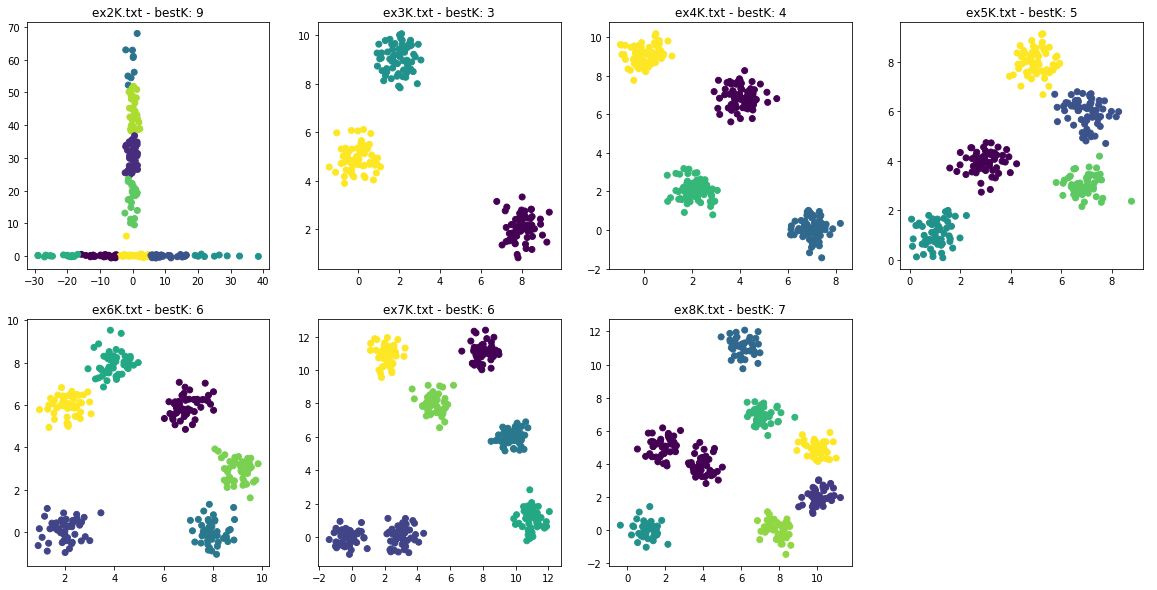

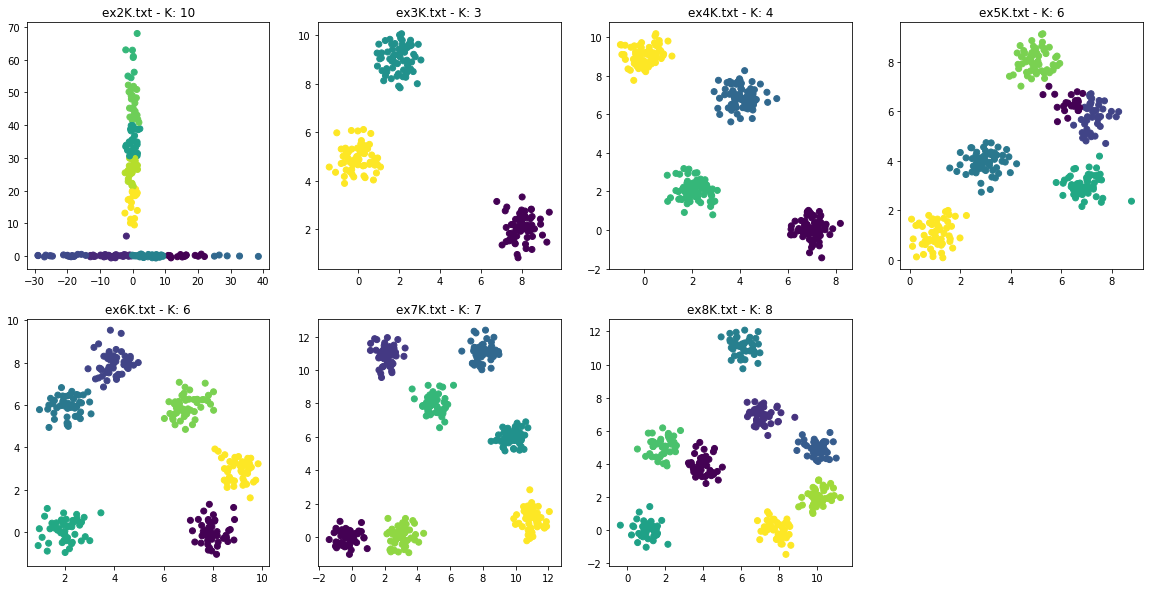

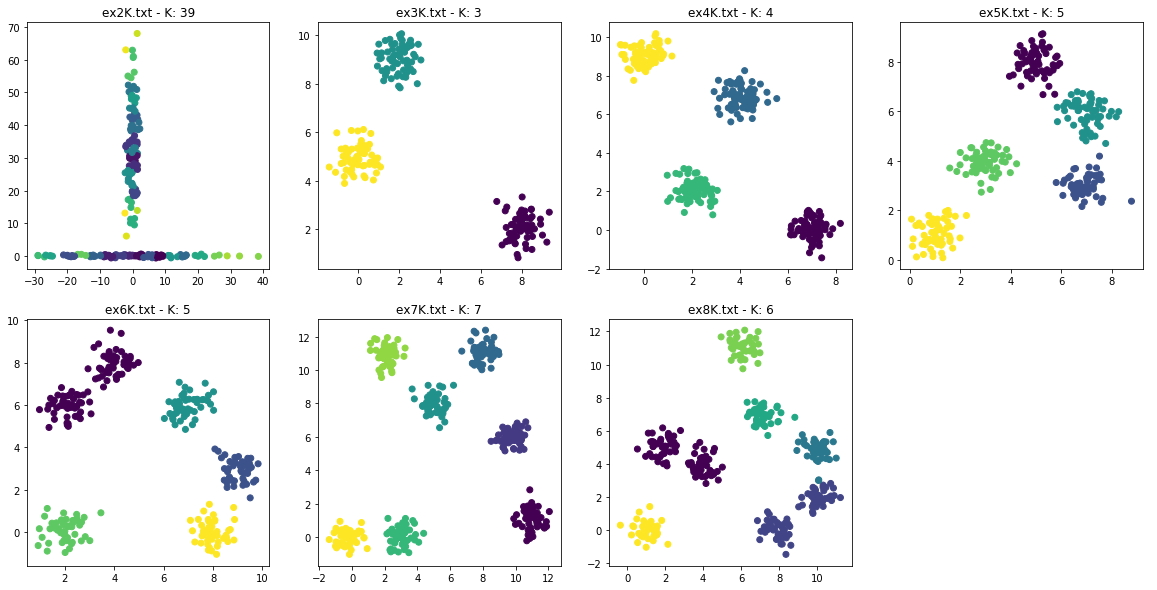

In [31]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift

start, end = 2, 8


fig, axes = plt.subplots(nrows=(end - start + 1) // 4 + ((end - start + 1) % 4 != 0), ncols=4, figsize=(20, 10))

for i in range(start, end + 1):
    X = np.loadtxt('ex' + str(i) + 'K.txt', delimiter=',')
    
    Rmin = np.inf
    bestK = 0
    bestLabels = None
    for k in range(2, 10):
        alg = KMeans(n_clusters=k).fit(X)
        Ractual = davies_bouldin(X, alg.cluster_centers_, k, alg.labels_)
        if Ractual < Rmin:
            Rmin = Ractual
            bestK = k
            bestLabels = alg.labels_
            
    axes[(i-2)//4, (i-2) % 4].scatter(X[:,0], X[:,1], c = bestLabels)
    axes[(i-2)//4, (i-2) % 4].set_title('ex' + str(i) + 'K.txt - bestK: ' + str(bestK))

for j in range((i-1) % 4,4):
    axes[(i-2)//4, j % 4].set_axis_off()
    
    
fig, axes = plt.subplots(nrows=(end - start + 1) // 4 + ((end - start + 1) % 4 != 0), ncols=4, figsize=(20, 10))
for i in range(start, end+1):
    X = np.loadtxt('ex'+str(i)+'K.txt', delimiter=',')
    
    clustering = AffinityPropagation().fit(X)
    
    axes[(i-2)//4, (i-2) % 4].scatter(X[:,0], X[:,1], c = clustering.labels_)
    axes[(i-2)//4, (i-2) % 4].set_title('ex' + str(i) + 'K.txt - K: ' + str(len(np.unique(clustering.labels_))))
    
for j in range((i-1) % 4, 4):
    axes[(i-2)//4, j % 4].set_axis_off()
    
    
    
fig, axes = plt.subplots(nrows=(end-start+1)//4 + ((end-start+1)%4 != 0), ncols=4, figsize=(20,10))
for i in range(start, end+1):
    X = np.loadtxt('ex'+str(i)+'K.txt', delimiter=',')
    
    clustering = MeanShift(bandwidth=2).fit(X)
    
    axes[(i-2)//4, (i-2) % 4].scatter(X[:,0], X[:,1], c = clustering.labels_)
    axes[(i-2)//4, (i-2) % 4].set_title('ex' + str(i) + 'K.txt - K: ' + str(len(np.unique(clustering.labels_))))
    
for j in range((i-1) % 4, 4):
    axes[(i-2)//4, j % 4].set_axis_off()

## Otros datos [Opcional]
Puedes repetir la ejecución anterior con otros datos sintéticos creados con los métodos de scikit que te permitan ver cómo se comporta kmeans en los diferentes casos.
<http://scikit-learn.org/stable/modules/classes.html#samples-generator>

In [32]:
# <RELLENAR>